# Модуль 1

## Обработка данных 

In [137]:
import pandas as pd
import numpy as np
from pprint import pprint
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import nltk

In [138]:
df = pd.read_csv('data/bank-full.csv')

In [139]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [141]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

### Численные признаки

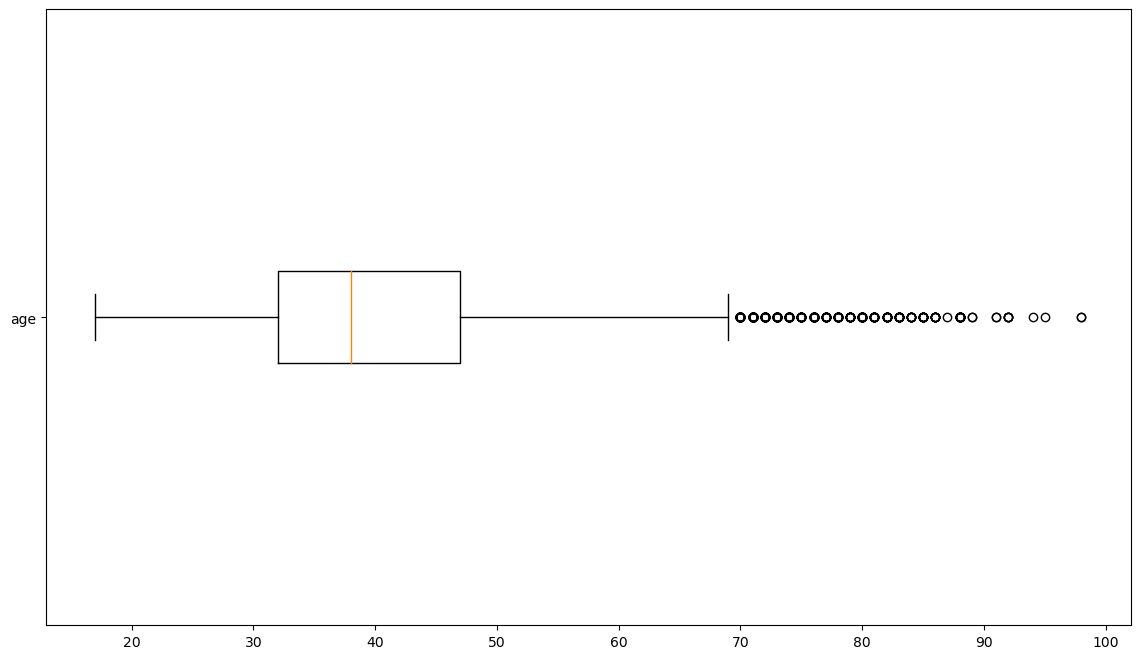

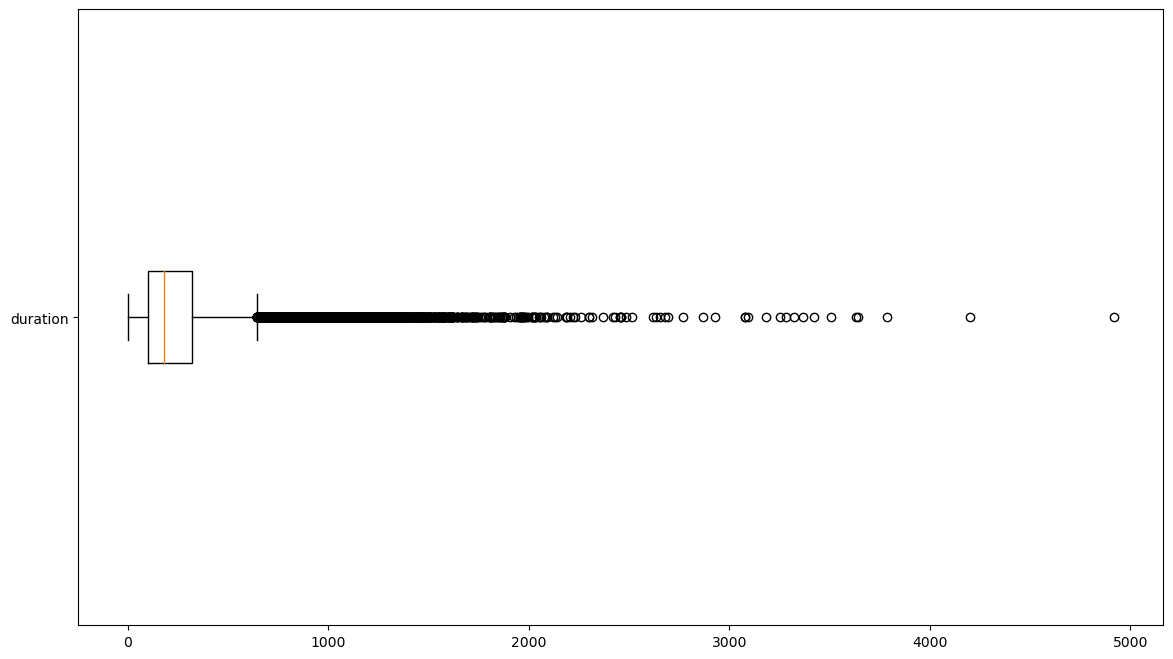

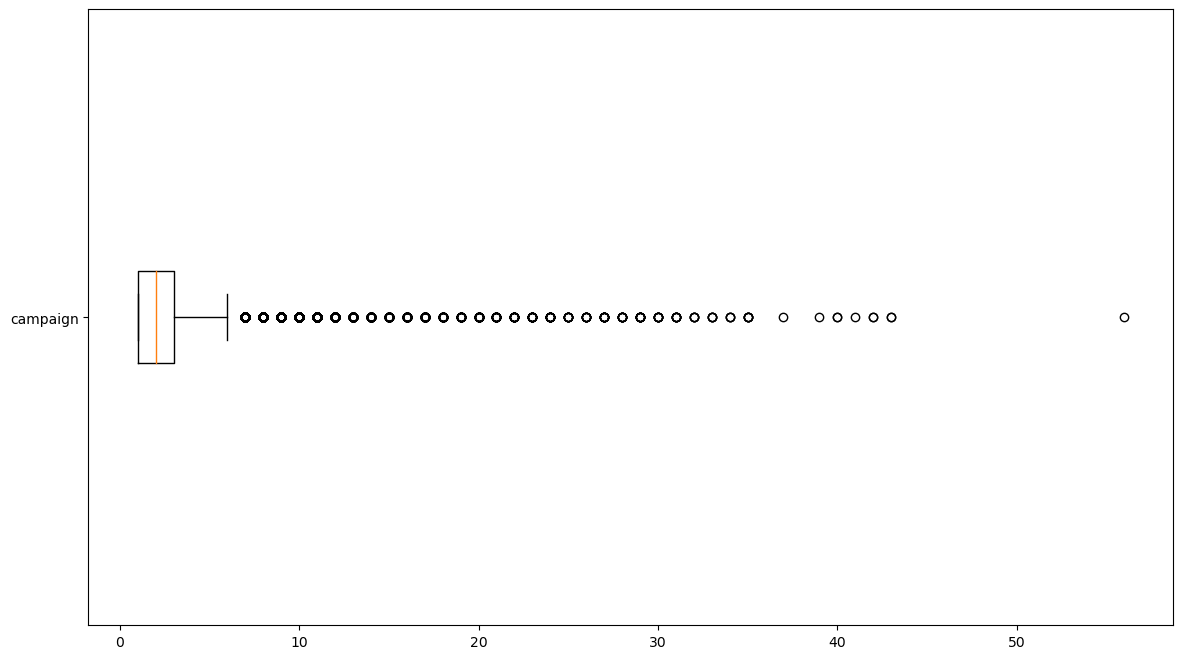

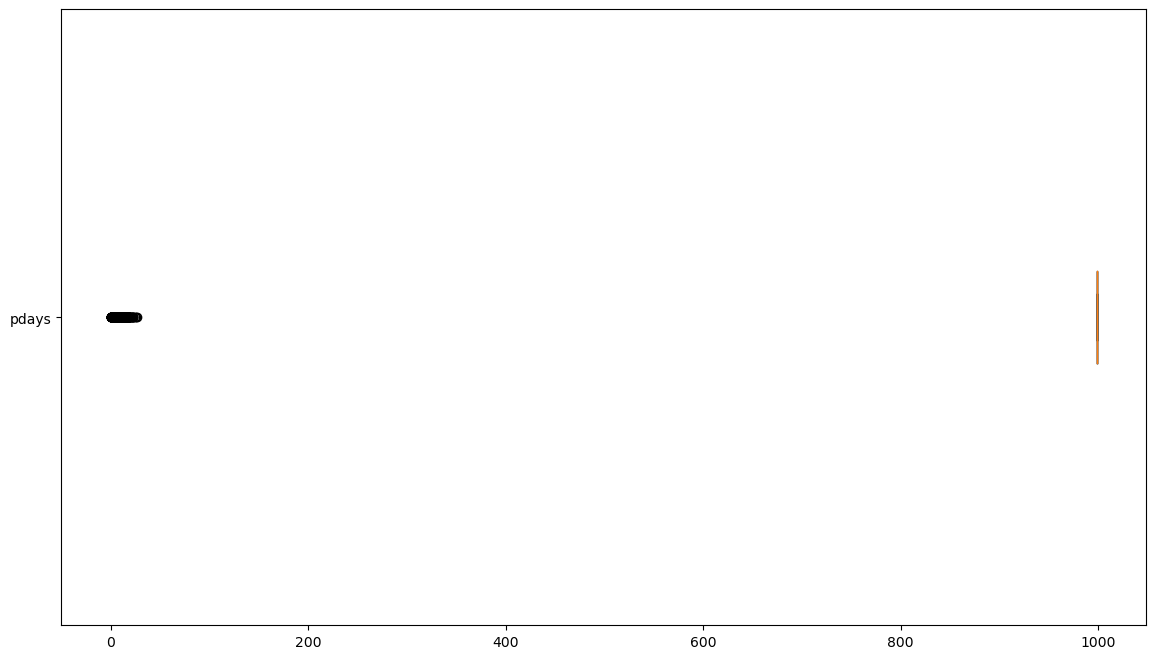

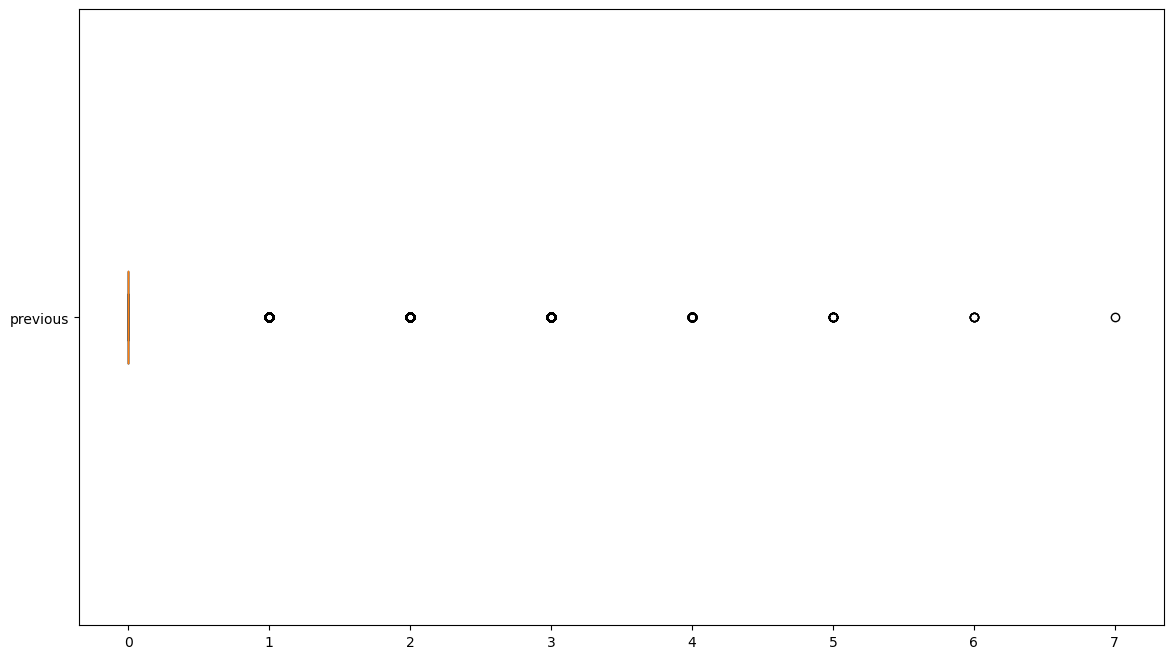

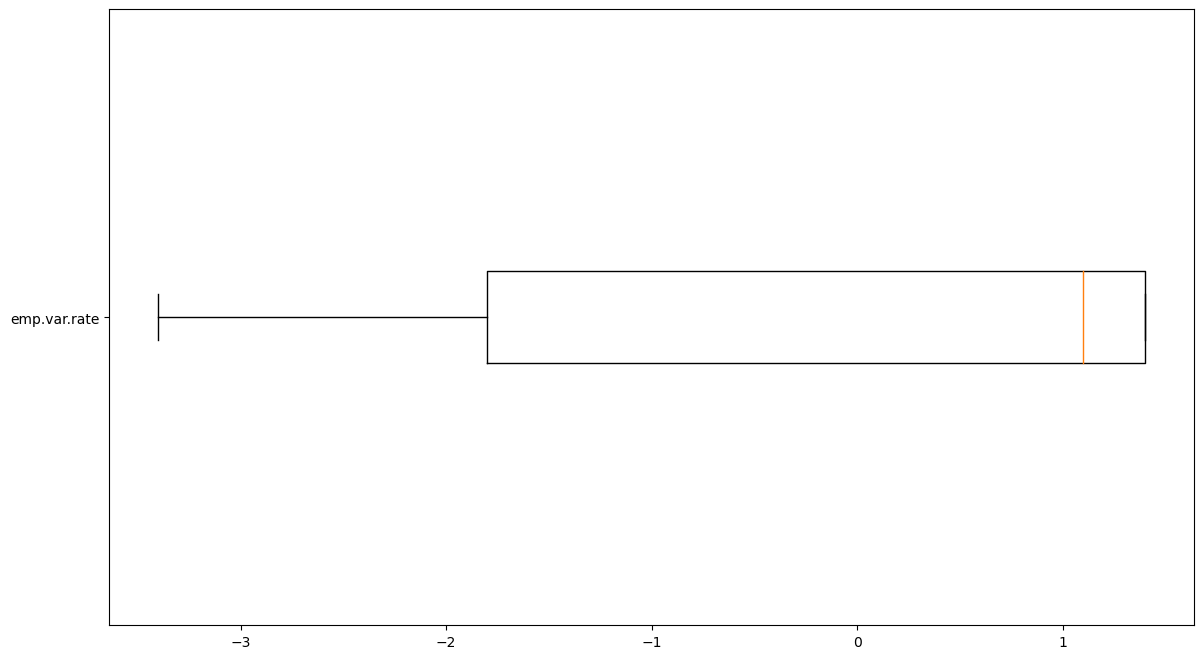

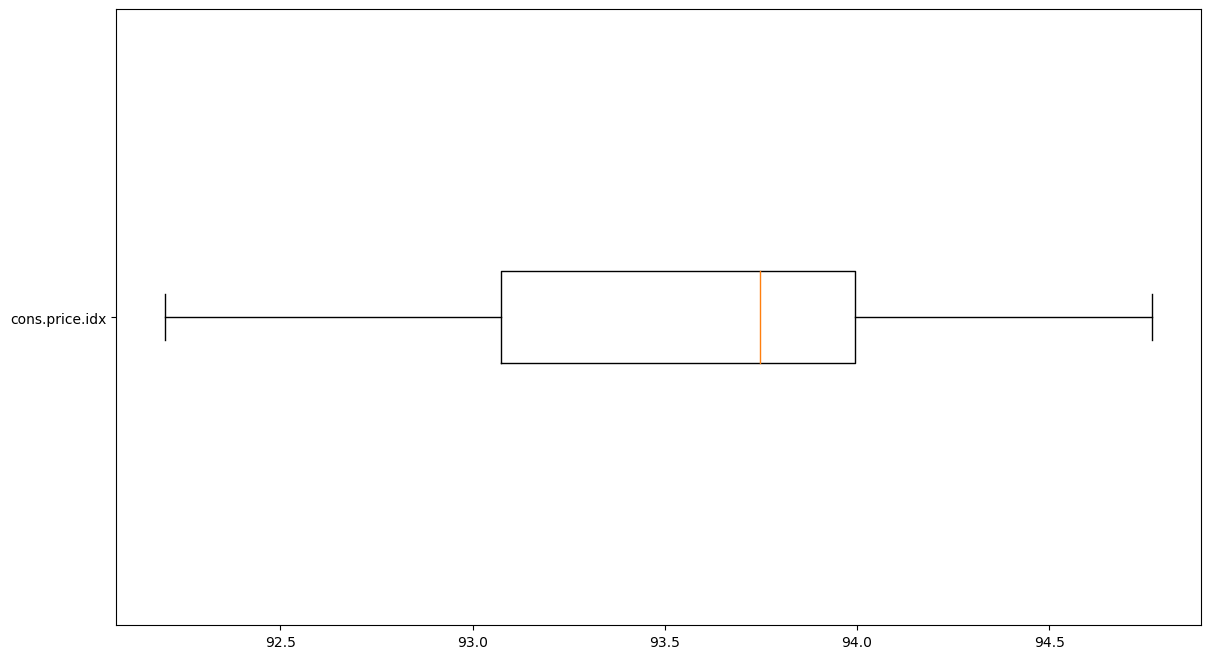

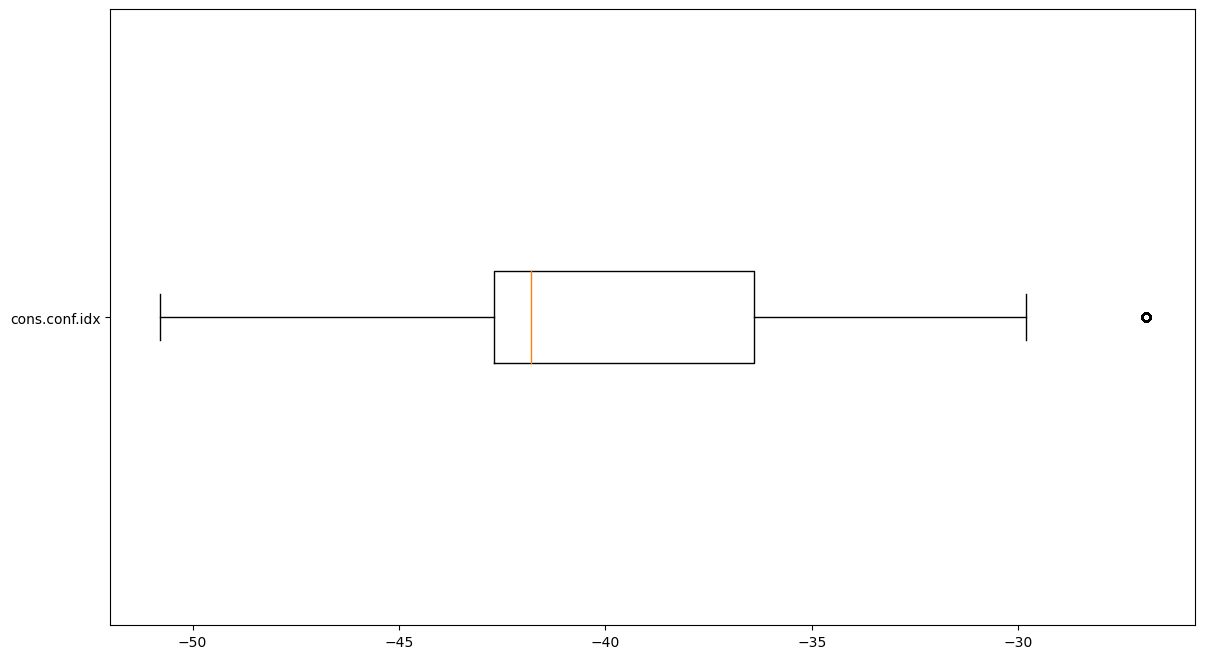

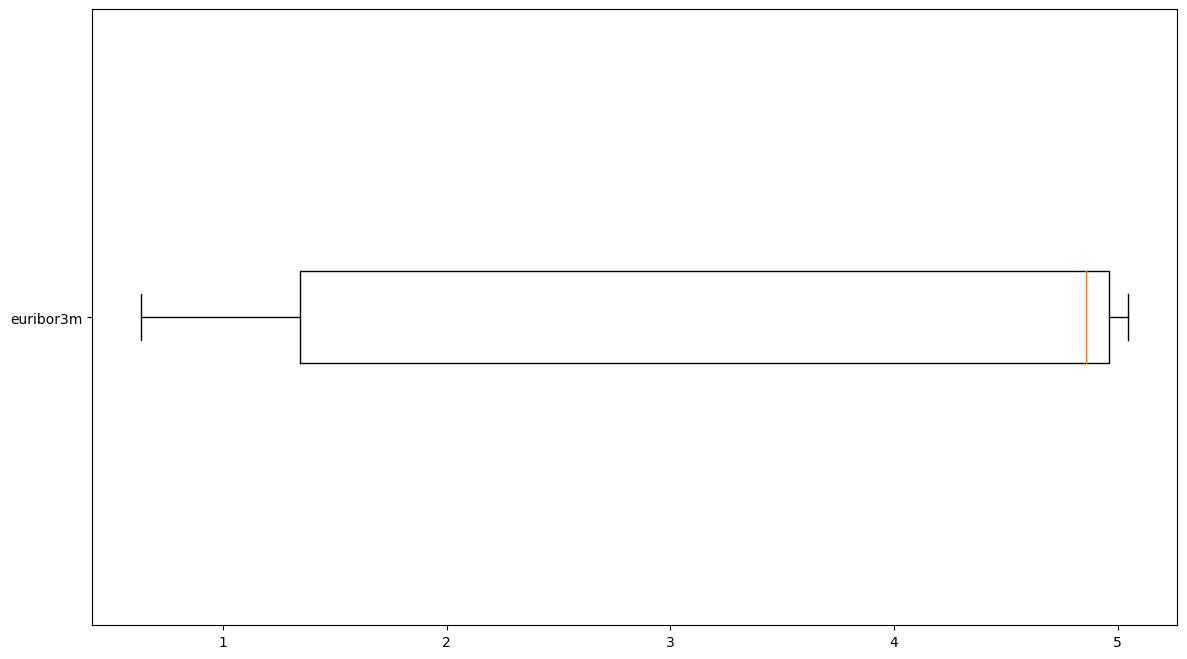

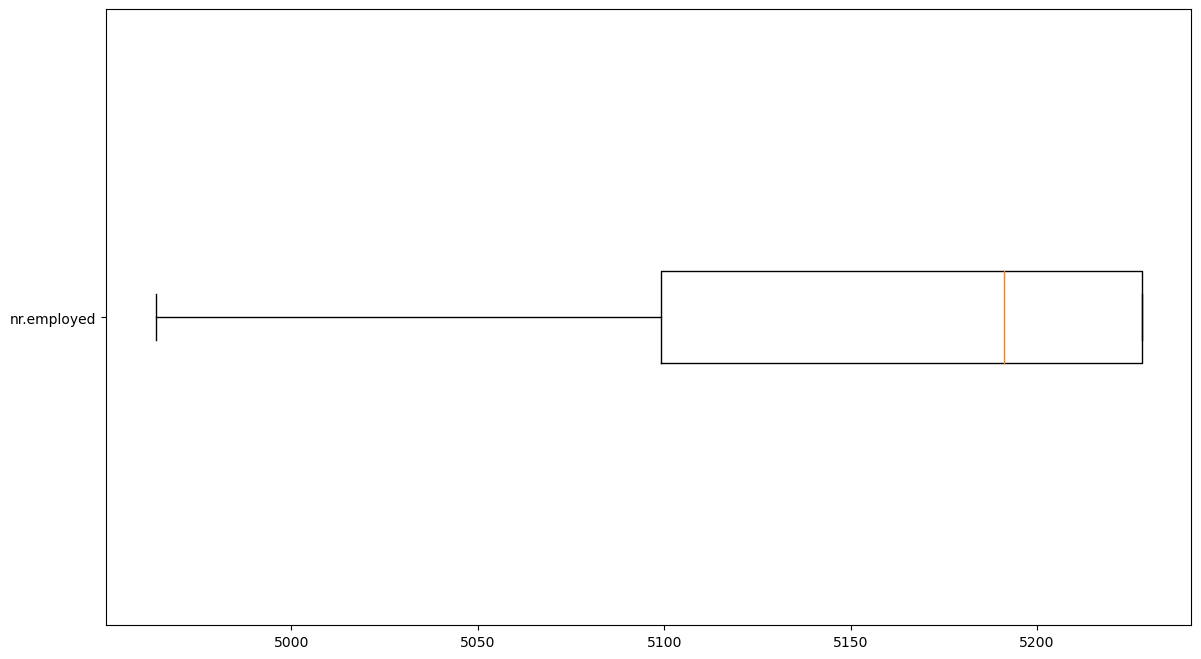

In [142]:
for e in df.select_dtypes(['int64','float64']):
    plt.figure(figsize=(14,8))
    plt.boxplot(df[e],vert=0,labels=[e])

In [143]:
q1 = np.percentile(df['duration'], 25, method='midpoint')
q3 = np.percentile(df['duration'], 75, method='midpoint')
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
upper_array = np.where(df['duration'] >= upper)[0]
lower_array = np.where(df['duration'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

### Категориальные признаки

In [144]:
df_missings = df.copy().select_dtypes(include=['object'])
df_missings = df_missings.replace('unknown', np.nan)

df_missings.isna().mean() * 100

job             0.810988
marital         0.185742
education       4.193591
default        20.902551
housing         2.417266
loan            2.417266
contact         0.000000
month           0.000000
day_of_week     0.000000
poutcome        0.000000
subscribed      0.000000
dtype: float64

In [145]:
cat_col = df.select_dtypes(['object']).columns
df[cat_col] = df[cat_col].apply(lambda x: pd.factorize(x)[0])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38225 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38225 non-null  int64  
 1   job             38225 non-null  int64  
 2   marital         38225 non-null  int64  
 3   education       38225 non-null  int64  
 4   default         38225 non-null  int64  
 5   housing         38225 non-null  int64  
 6   loan            38225 non-null  int64  
 7   contact         38225 non-null  int64  
 8   month           38225 non-null  int64  
 9   day_of_week     38225 non-null  int64  
 10  duration        38225 non-null  int64  
 11  campaign        38225 non-null  int64  
 12  pdays           38225 non-null  int64  
 13  previous        38225 non-null  int64  
 14  poutcome        38225 non-null  int64  
 15  emp.var.rate    38225 non-null  float64
 16  cons.price.idx  38225 non-null  float64
 17  cons.conf.idx   38225 non-null  floa

In [147]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [148]:
df1 = df

### Кластеризация

In [149]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
X = df

In [151]:
scaler = StandardScaler()

In [152]:
df_vectors_scaled = scaler.fit_transform(X)

In [153]:
model = KMeans(n_clusters=25)

In [154]:
cluster_labels = model.fit_predict(df_vectors_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [155]:
cluster_labels

array([ 2,  9, 10, ..., 15, 16, 11])

In [156]:
len(df_vectors_scaled)

38225

In [157]:
len(cluster_labels)

38225

In [158]:
X['Cluster'] = cluster_labels

<Axes: >

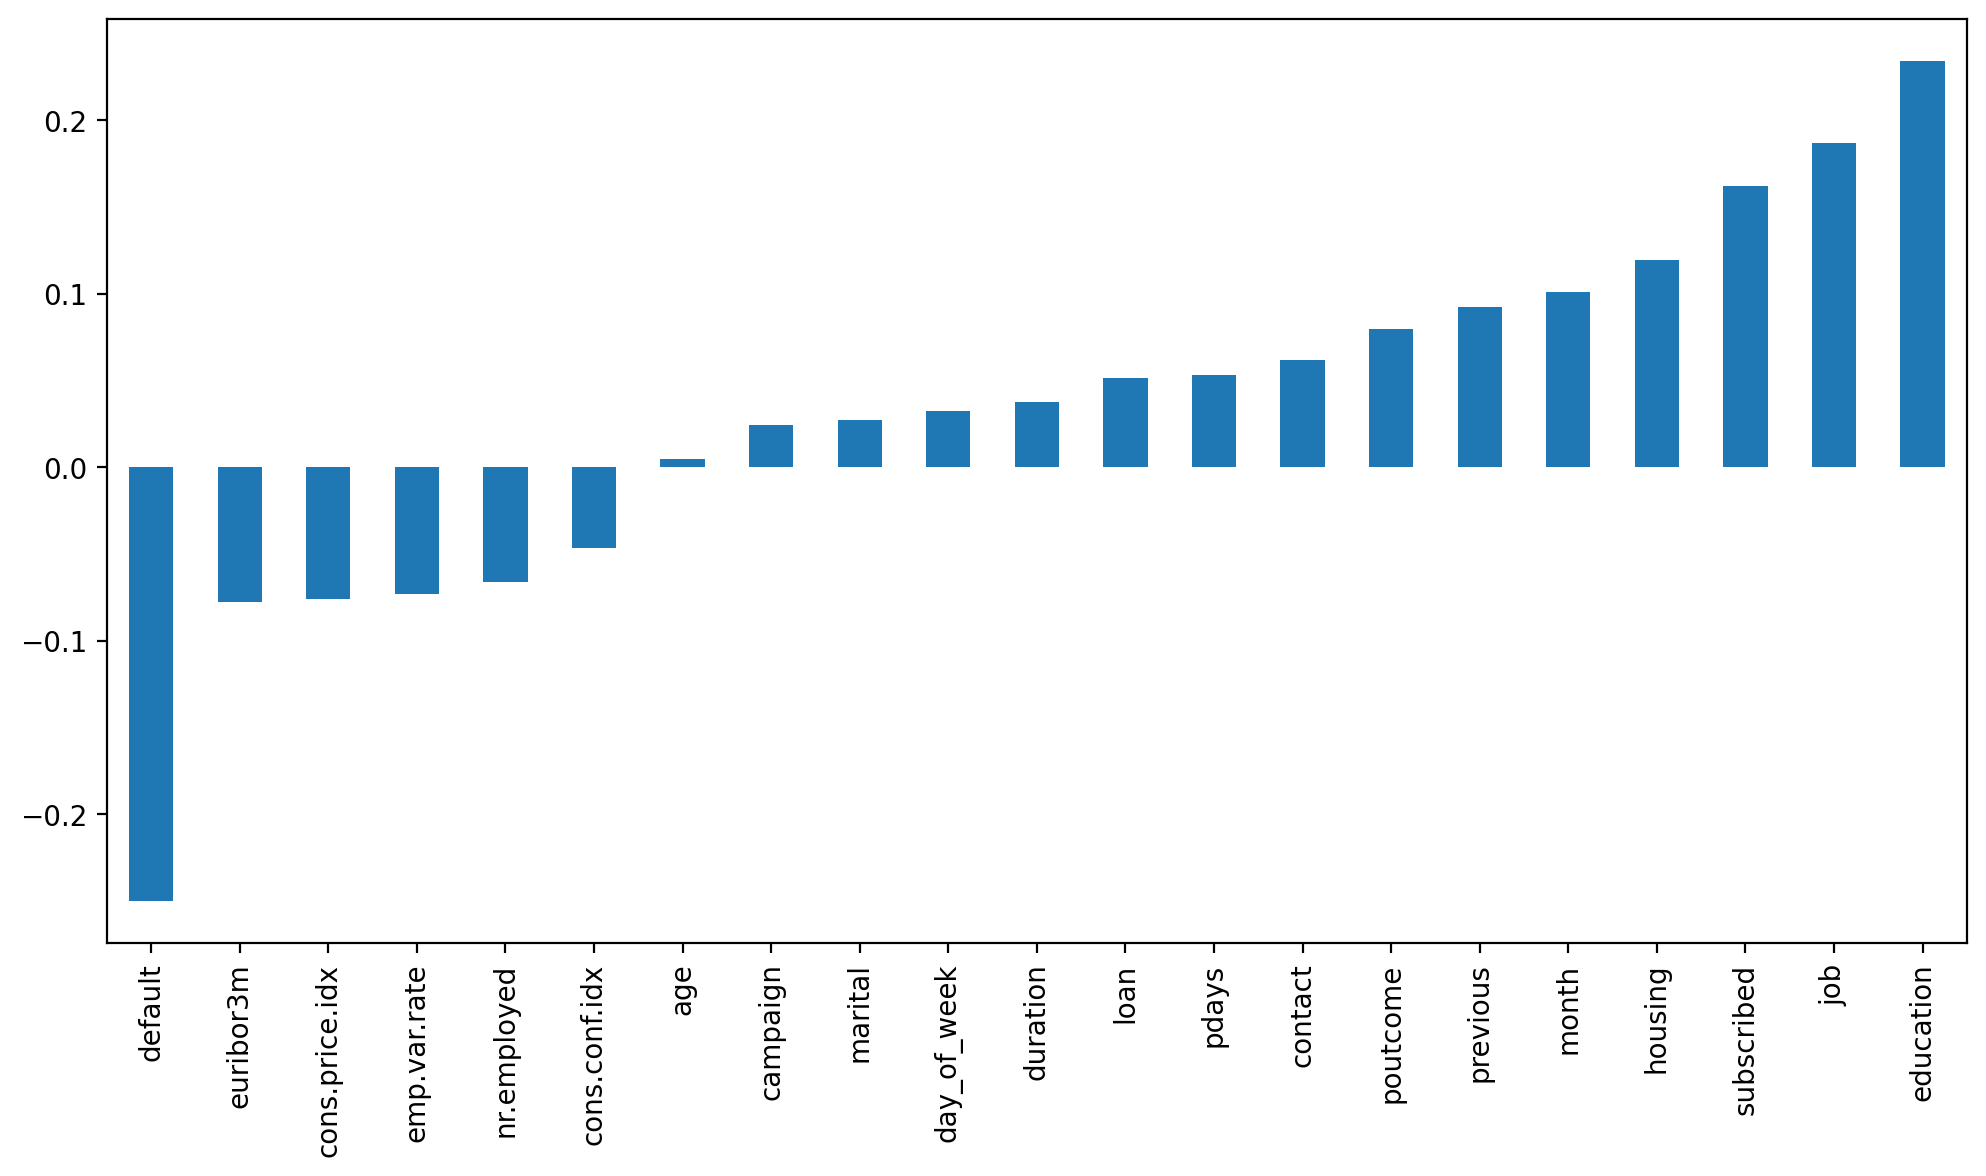

In [159]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [160]:
ssd = []
for k in range(2,25):
    model = KMeans(n_clusters=k)

    model.fit(df_vectors_scaled)

    ssd.append(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, ' Sum of Squared Distances')

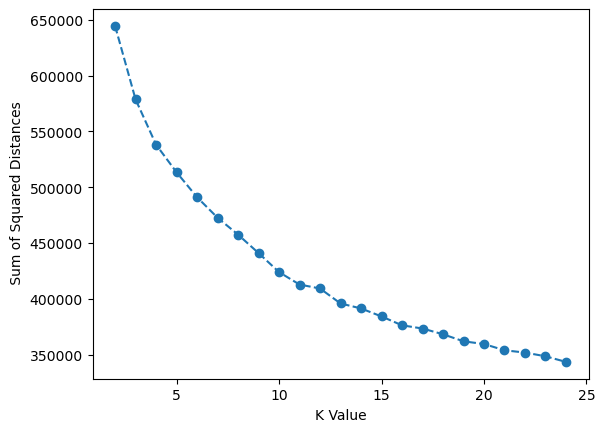

In [161]:
plt.plot(range(2,25),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

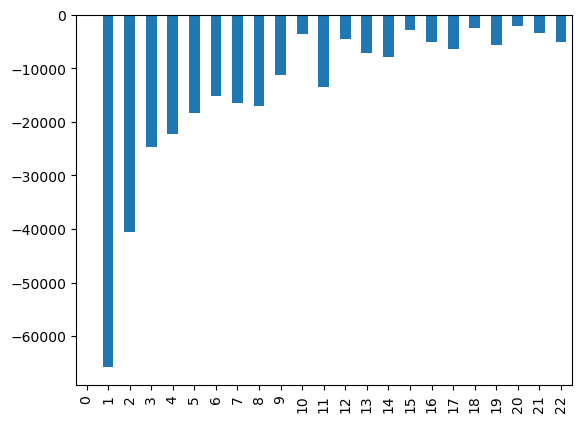

In [162]:
pd.Series(ssd).diff().plot(kind='bar')

### 2 способ Понижение размерности с методом t-SNE

In [163]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [164]:
df = datasets.load_iris()

In [165]:
model = TSNE(learning_rate=100)

In [166]:
transformed = model.fit_transform(df.data)

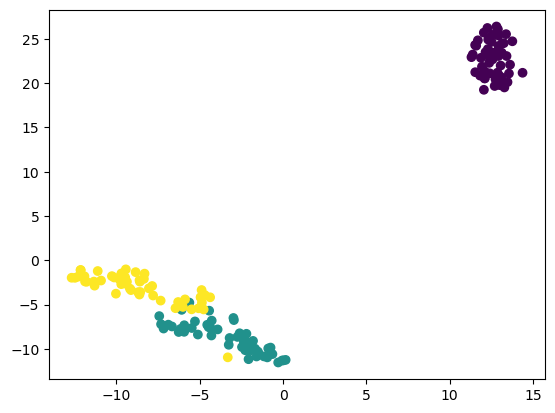

In [167]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=df.target)
plt.show()

# Модуль 2

In [168]:
y = df1['subscribed']
X=df1.drop(["subscribed"], axis=1)

In [169]:
from sklearn.model_selection import  train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=17)

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

SyntaxError: invalid syntax (2167257205.py, line 5)

In [172]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [173]:
%%time
tree.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 60.2 ms


DecisionTreeClassifier(max_depth=5, random_state=17)

In [174]:
%%time
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 7.01 ms


KNeighborsClassifier(n_neighbors=10)

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [176]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.9769794209975584

In [193]:
report = classification_report(y_test, tree_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10534
           1       0.91      0.79      0.85       934

    accuracy                           0.98     11468
   macro avg       0.95      0.89      0.92     11468
weighted avg       0.98      0.98      0.98     11468



In [183]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [184]:
lr = LogisticRegression(random_state=42)

In [185]:
lr.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [196]:
y_pred=lr.predict(X_test)

In [201]:
accuracy_score(y_test, y_pred)

0.9389605859783746

In [198]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10534
           1       0.68      0.47      0.56       934

    accuracy                           0.94     11468
   macro avg       0.82      0.72      0.76     11468
weighted avg       0.93      0.94      0.93     11468



In [188]:
from sklearn.svm import SVC

In [190]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

SVC(random_state=1)

In [199]:
svc_pred = svm.predict(X_test)

In [200]:
report = classification_report(y_test, svc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10534
           1       0.61      0.27      0.37       934

    accuracy                           0.93     11468
   macro avg       0.77      0.63      0.67     11468
weighted avg       0.91      0.93      0.91     11468



In [202]:
accuracy_score(y_test, svc_pred)

0.9261423090338333

## Итог работы
### 1)Были изучены и преобразованны данные
### 2)Была выполнена кластеризация способами к-средних и t-SNE
### 3) 3 модели обученных на svc, LR и DTC показали хорошие результаты выше 90%, но самой эффективной оказалась DTC.